In [354]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [355]:
##loading Data

wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel =pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
roller_coaster = pd.read_csv('roller_coasters.csv') 

print(wood.head(10))
print(steel.head())
print(roller_coaster.head())

   Rank               Name                       Park             Location  \
0     1       Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2            El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3            Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4         The Voyage              Holiday World    Santa Claus, Ind.   
4     5        Thunderhead                  Dollywood  Pigeon Forge, Tenn.   
5     6    Ravine Flyer II                  Waldameer            Erie, Pa.   
6     7         Outlaw Run         Silver Dollar City         Branson, Mo.   
7     8          The Beast               Kings Island    Kings Mills, Ohio   
8     9    Lightning Racer                Hersheypark         Hershey, Pa.   
9    10  Shivering Timbers       Michigan’s Adventure      Muskegon, Mich.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        20

#### Write a function that will plot the ranking of a given roller coaster over time as a line. Make sure to include informative labels that describe your visualization.

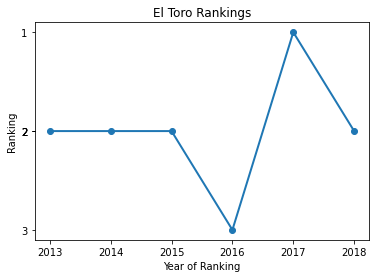

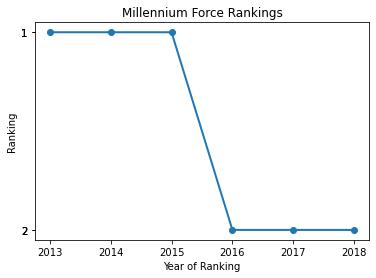

In [356]:
def one_roller_coaster(c_name, p_name, df):
    
    ranking = df[(df['Name'] == c_name) & (df['Park'] == p_name)]
    #print(ranking)
    
    fig = plt.figure()
    fig = fig.add_subplot()
    fig.plot(ranking['Year of Rank'], ranking['Rank'], marker = 'o', linewidth = 2)
    fig.set_xticks(ranking['Year of Rank'].values)
    fig.set_yticks(ranking['Rank'].values)
    plt.xlabel('Year of Ranking')
    plt.ylabel('Ranking')
    plt.title('{} Rankings'.format(c_name))
    fig.invert_yaxis()

one_roller_coaster('El Toro', 'Six Flags Great Adventure', wood)
one_roller_coaster('Millennium Force', 'Cedar Point', steel)

#### Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

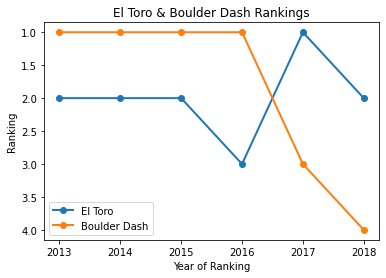

In [357]:
def two_roller_coaster(c1_name, p1_name, c2_name, p2_name, df):
    
    ranking1 = df[(df['Name'] == c1_name) & (df['Park'] == p1_name)]
    ranking2 = df[(df['Name'] == c2_name) & (df['Park'] == p2_name)]
    #print(ranking)
    
    fig = plt.figure()
    fig = fig.add_subplot()
    fig.plot(ranking1['Year of Rank'], ranking1['Rank'], marker = 'o', linewidth = 2)
    fig.plot(ranking2['Year of Rank'], ranking2['Rank'], marker = 'o', linewidth = 2)
    #fig.set_xticks(ranking['Year of Rank'].values)
    #fig.set_yticks(ranking['Rank'].values)
    plt.xlabel('Year of Ranking')
    plt.ylabel('Ranking')
    plt.title('{} & {} Rankings'.format(c1_name, c2_name))
    plt.legend([c1_name, c2_name])
    fig.invert_yaxis()

two_roller_coaster('El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce', wood)

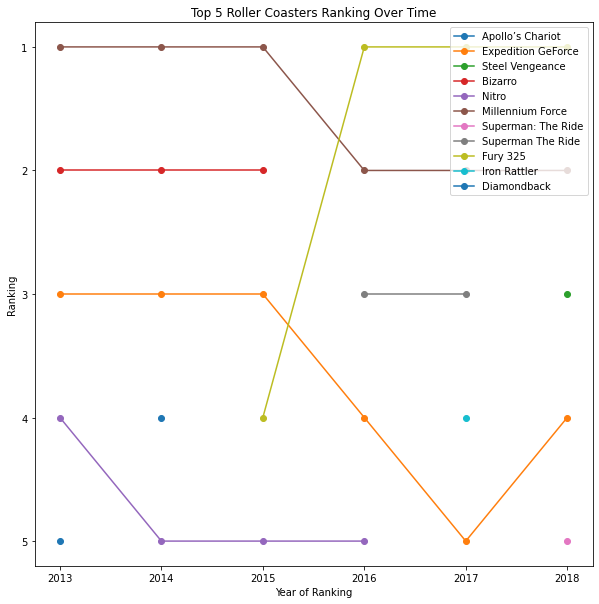

In [358]:
def n_roller_coaster(n, df):
    data = df[df['Rank'] <= n]
    #print(c_names)
    
    fig = plt.figure(figsize = (10,10))
    fig = fig.add_subplot()
    for c_name in set(data['Name']):
        c_ranking = data[data['Name'] == c_name]
        fig.plot(c_ranking['Year of Rank'], c_ranking['Rank'], marker = 'o', label = c_name)
    plt.title('Top {} Roller Coasters Ranking Over Time'.format(n))
    plt.xlabel('Year of Ranking')
    plt.ylabel('Ranking')
    fig.invert_yaxis()
    fig.set_yticks([i for i in range(1, n+1)])
    plt.legend(loc = 1)
    
n_roller_coaster(5, steel)

#### Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

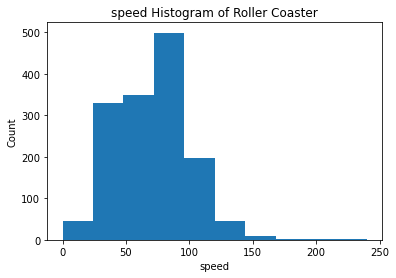

In [359]:
def any_hist(clm_name, df):
    
    
    plt.hist(df[clm_name].dropna())
    plt.title('{} Histogram of Roller Coaster'.format(clm_name))
    plt.xlabel(clm_name)
    plt.ylabel('Count')
    plt.show()
    
any_hist('speed', roller_coaster)

#### Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

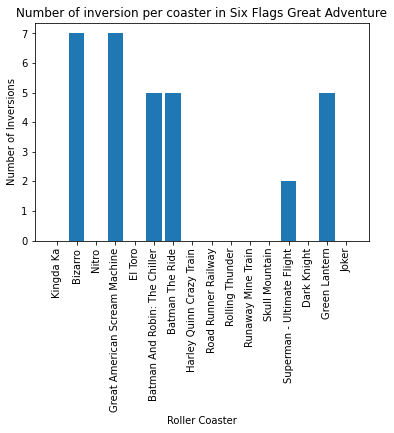

In [360]:
def bar_inversion(p_name, df):
    
    df = df[df['park'] == p_name]
    #df = df.sort_values('num_inversions', ascending=False)
    #print(df)
    fig = plt.figure()
    fig = fig.add_subplot()
    fig.bar(range(len(df['num_inversions'])), df['num_inversions'])
    plt.title('Number of inversion per coaster in {}'.format(p_name))
    plt.xlabel('Roller Coaster')
    plt.ylabel('Number of Inversions')
    fig.set_xticks(range(len(df['name'])))
    fig.set_xticklabels(df['name'], rotation = 90)

bar_inversion('Six Flags Great Adventure',roller_coaster)

#### Write a function that creates a pie chart that compares the number of operating roller coasters to the number of closed roller coasters. Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization

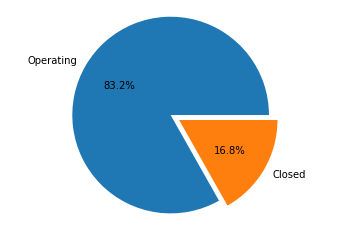

In [361]:
def status_pie(df):
    
    operating = len(df[df['status'] == 'status.operating'])
    closed = len(df[df['status'] == 'status.closed.definitely'])
    status = [operating, closed]
    #print(status)
    plt.pie(status, explode = (0, 0.1), labels = (['Operating', 'Closed']), autopct ='%0.1f%%')
    plt.axis('equal')
    plt.show()

status_pie(roller_coaster)

#### Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

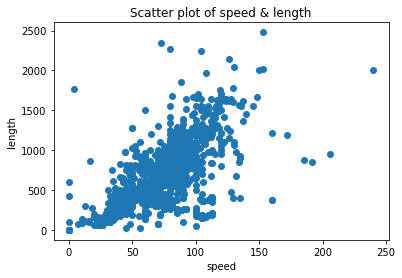

In [362]:
def plt_scatter(clm1, clm2, df):
    
    plt.scatter(df[clm1], df[clm2])
    plt.title('Scatter plot of {} & {}'.format(clm1, clm2))
    plt.xlabel(clm1)
    plt.ylabel(clm2)
    plt.show()
    
plt_scatter('speed', 'length', roller_coaster)

#### What roller coaster seating type is most popular?

Text(0.5, 1.0, 'Most Popupar Roller Coaster Seating Type')

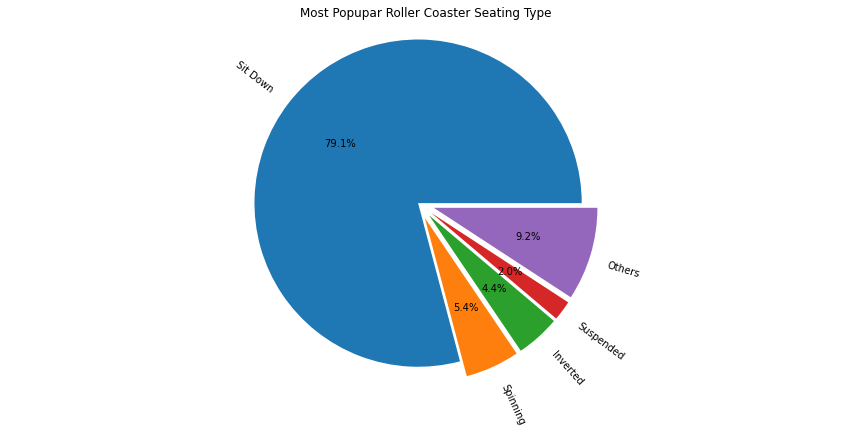

In [363]:
df = roller_coaster.groupby(['seating_type']).name.size().sort_values(ascending = False).reset_index()
#print(df)


"""fig = plt.figure()
fig = fig.add_subplot(2, 1, 1)
fig.bar(range(len(df['name'])), df['name'])
plt.title('Most Popupar Roller Coaster Seating Type')
plt.xlabel('Seating Type')
plt.ylabel('Count')
fig.set_xticks(range(len(df['seating_type'])))
fig.set_xticklabels(df['seating_type'], rotation = 90)"""

#pie chart will make more sense
temp_1 = df[df['name'] > 50]
temp_2 = df[df['name'] < 50]
temp =  temp_2.name.sum()
temp_2 = pd.DataFrame([['Others', temp]], columns = ['seating_type', 'name'])
df = pd.concat([temp_1, temp_2], ignore_index = True)
#print(df2)
fig = plt.figure(figsize = (15, 15))
fig = fig.add_subplot(2, 1, 2)
fig.pie(df['name'], explode = (0, 0.1, 0.1, 0.1, 0.1),\
            rotatelabels=True, autopct='%0.1f%%', labels = df['seating_type'])
plt.axis('equal')
plt.title('Most Popupar Roller Coaster Seating Type')